<a href="https://colab.research.google.com/github/KanikaRana29/Data-Science-Assignment/blob/main/Kanika_Rana_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

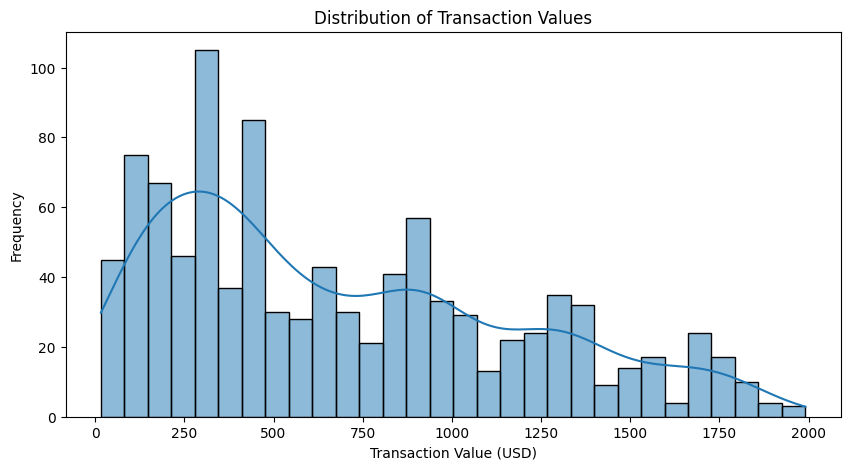

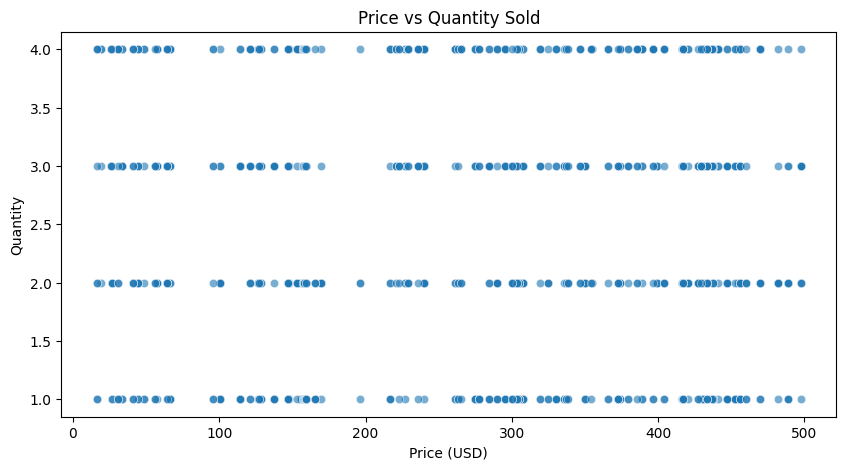

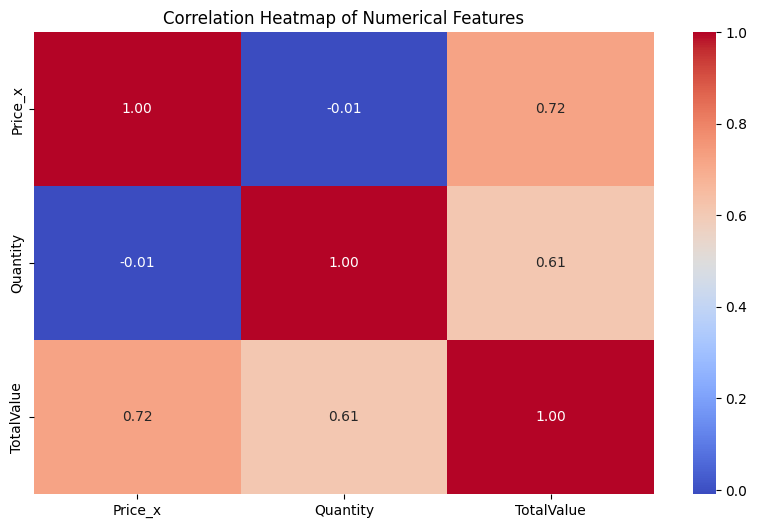

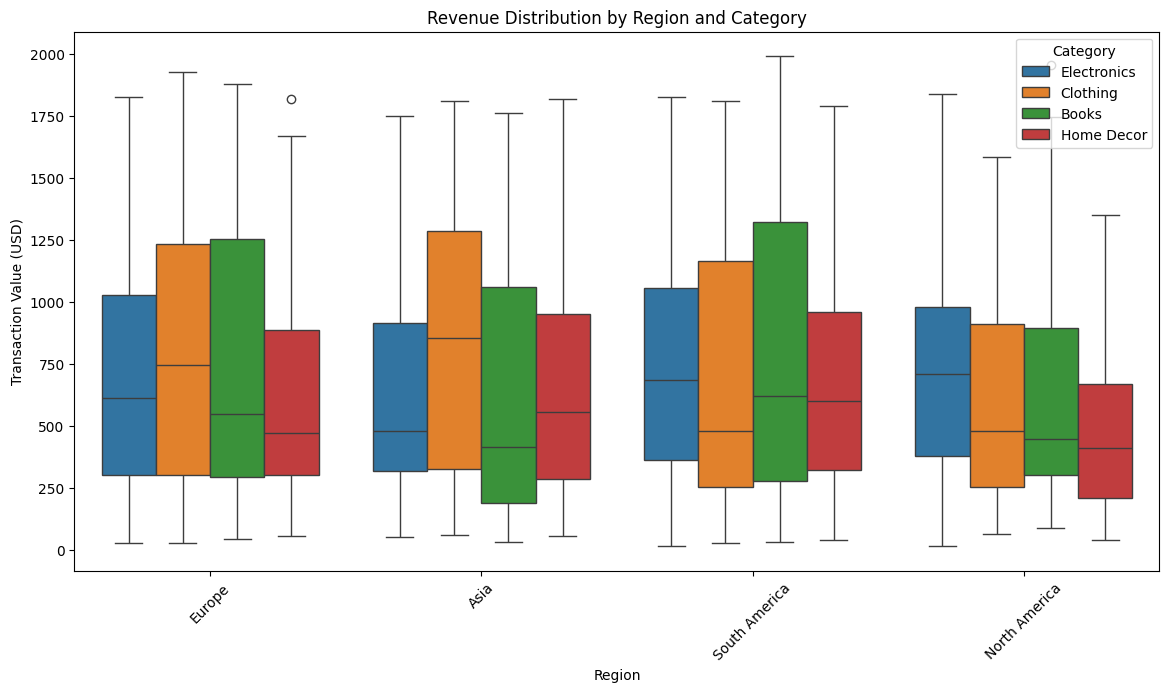

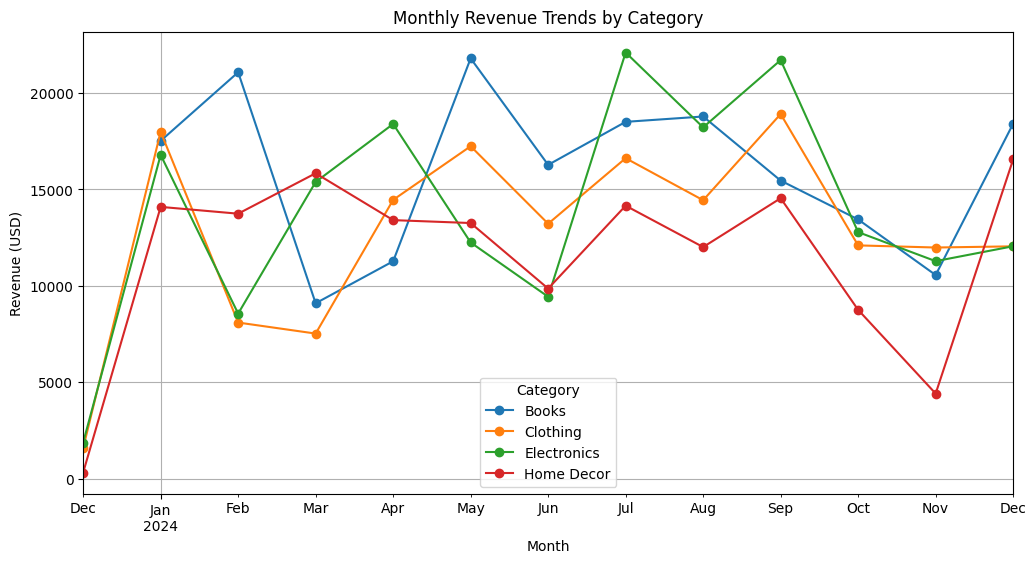


Total Revenue Per Product:
 ProductName
ActiveWear Smartwatch          39096.97
SoundWave Headphones           25211.64
SoundWave Novel                24507.90
ActiveWear Jacket              22712.56
ActiveWear Rug                 22314.43
                                 ...   
ComfortLiving Desk Lamp         1694.16
SoundWave Bluetooth Speaker     1223.22
ComfortLiving Rug               1063.81
ActiveWear T-Shirt               795.34
ComfortLiving Laptop             647.76
Name: TotalValue, Length: 66, dtype: float64

Top 5 Customers by Spending:
 CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64

Popular Product Categories:
 Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             

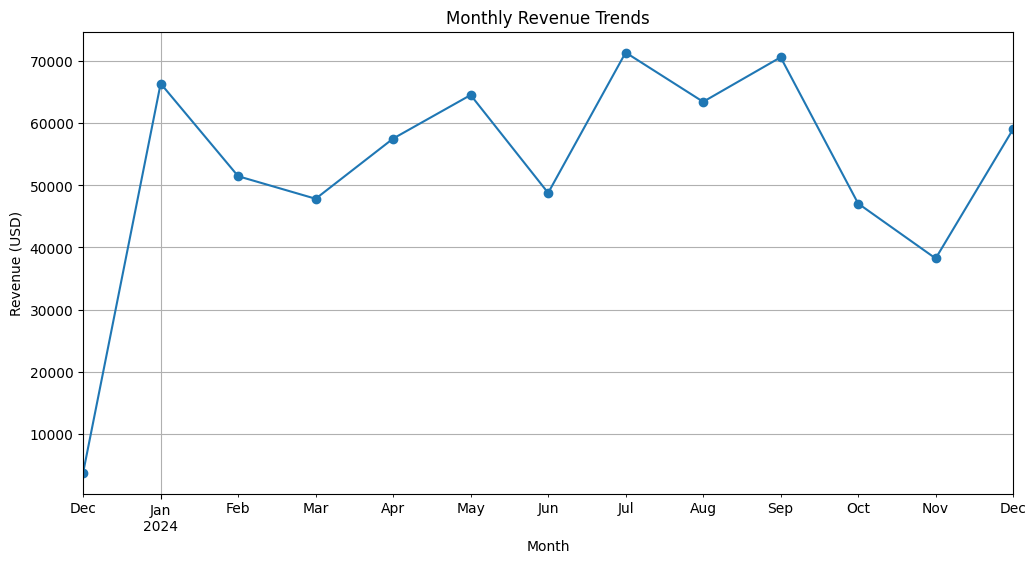

In [7]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# To know the information about datasets
print('Customers Dataset:')
print(customers.info())
print(customers.head())

print('\nProducts Dataset:')
print(products.info())
print(products.head())

print('\nTransactions Dataset:')
print(transactions.info())
print(transactions.head())

# Merge datasets for easy analysis as we don't have large datasets so we can easily perform EDA on one meget dataset only
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# To know the information about merged dataset
print('\nMerged Dataset:')
print(merged_data.info())
print(merged_data.head())

# To know the null values
print(merged_data.isnull().sum())

# To know the duplicate rows
duplicates = merged_data.duplicated()
print(duplicates.sum())

# Univariate Analysis
# Distribution of transaction values
plt.figure(figsize=(10, 5))
sns.histplot(merged_data['TotalValue'], kde=True, bins=30)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
# Relationship between price and quantity sold
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x='Price_x', y='Quantity', alpha=0.6)
plt.title('Price vs Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity')
plt.show()

# Multivariate Analysis
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
correlation_matrix = merged_data[['Price_x', 'Quantity', 'TotalValue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Revenue distribution across regions and categories
plt.figure(figsize=(14, 7))
sns.boxplot(data=merged_data, x='Region', y='TotalValue', hue='Category')
plt.title('Revenue Distribution by Region and Category')
plt.xlabel('Region')
plt.ylabel('Transaction Value (USD)')
plt.legend(title='Category', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Revenue trends by category over months
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.to_period('M')
category_monthly_trends = merged_data.groupby(['TransactionMonth', 'Category'])['TotalValue'].sum().unstack()
category_monthly_trends.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Revenue Trends by Category')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.grid()
plt.legend(title='Category')
plt.show()

# Insights
# 1. Total revenue generated per product
revenue_per_product = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print('\nTotal Revenue Per Product:\n', revenue_per_product)

# 2. Top 5 customers by total spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print('\nTop 5 Customers by Spending:\n', top_customers)

# 3. Popular product categories
popular_categories = merged_data['Category'].value_counts()
print('\nPopular Product Categories:\n', popular_categories)

# 4. Region-wise revenue
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print('\nRevenue by Region:\n', region_revenue)

# 5. Monthly transaction trends
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.to_period('M')
monthly_trends = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
print('\nMonthly Transaction Trends:\n', monthly_trends)

# Visualization for monthly trends
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.grid()
plt.show()
